In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
train_data=datasets.MNIST(root='data', train=True,transform=ToTensor(),download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 10924934.24it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 64433879.69it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 3777315.87it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6102027.15it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [5]:
#train_data=datasets.MNIST(root='data', train=True,transform=ToTensor(),download=True)
test_data=datasets.MNIST(root='data', train=False,transform=ToTensor(),download=True)

In [6]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [11]:
train_data.data.size()

torch.Size([60000, 28, 28])

In [12]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [13]:
train_data.targets.size()

torch.Size([60000])

In [14]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [15]:
from torch.utils.data import DataLoader

loaders={'train': DataLoader(train_data, batch_size=100,shuffle=True, num_workers=1),
         'test': DataLoader(test_data,batch_size=100,shuffle=True,num_workers=1),
}

In [16]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x14edd7b50>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x168e81790>}

In [26]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()

        self.convl=nn.Conv2d(1, 10, kernel_size=5)
        self.conv2=nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop=nn.Dropout2d()
        self.fc1=nn.Linear(320, 50)
        self.fc2=nn.Linear(50,10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.convl(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
    
        return F.softmax(x, dim=1)

In [25]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\tLoss: {loss.item():.6f}')

def test():
    model.eval()
    
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'].dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%)\n')


In [27]:
for epoch in range(1, 11):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.304305
Train Epoch: 1 [2000/60000 (3%)]	Loss: 2.295123
Train Epoch: 1 [4000/60000 (7%)]	Loss: 2.255846
Train Epoch: 1 [6000/60000 (10%)]	Loss: 2.125864
Train Epoch: 1 [8000/60000 (13%)]	Loss: 1.977289
Train Epoch: 1 [10000/60000 (17%)]	Loss: 1.842357
Train Epoch: 1 [12000/60000 (20%)]	Loss: 1.801282
Train Epoch: 1 [14000/60000 (23%)]	Loss: 1.753541
Train Epoch: 1 [16000/60000 (27%)]	Loss: 1.846059
Train Epoch: 1 [18000/60000 (30%)]	Loss: 1.696830
Train Epoch: 1 [20000/60000 (33%)]	Loss: 1.677013
Train Epoch: 1 [22000/60000 (37%)]	Loss: 1.686129
Train Epoch: 1 [24000/60000 (40%)]	Loss: 1.754299
Train Epoch: 1 [26000/60000 (43%)]	Loss: 1.714993
Train Epoch: 1 [28000/60000 (47%)]	Loss: 1.617994
Train Epoch: 1 [30000/60000 (50%)]	Loss: 1.676015
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.662539
Train Epoch: 1 [34000/60000 (57%)]	Loss: 1.627555
Train Epoch: 1 [36000/60000 (60%)]	Loss: 1.653570
Train Epoch: 1 [38000/60000 (63%)]	Loss: 1.651403
Train Epoch

In [28]:
device

device(type='cpu')

Prediction: 7


TypeError: Invalid shape (1, 28, 28) for image data

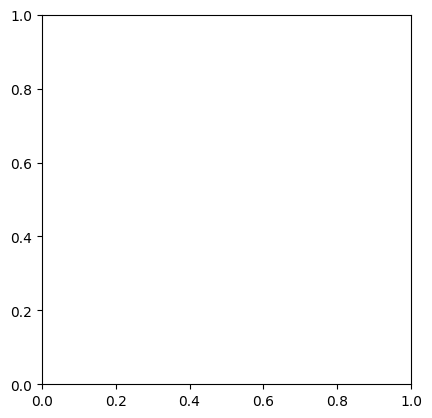

In [30]:
import matplotlib.pyplot as plt

model.eval()
data, target = test_data[0]
data = data.unsqueeze(0).to(device)  # Specify the dimension to unsqueeze
output = model(data)
prediction = output.argmax(dim=1, keepdim=True).item()
print(f'Prediction: {prediction}')
image = data.squeeze(0).cpu().numpy()
plt.imshow(image, cmap='gray')
plt.show()

